In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rcParams

import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams["xtick.labelsize"] = 15
rcParams["ytick.labelsize"] = 15
rcParams["legend.fontsize"] = "small"

pd.set_option("precision", 2)
warnings.filterwarnings("ignore")

%matplotlib inline


In [34]:
cd "C:\Users\Rucha Wete\Downloads"


C:\Users\Rucha Wete\Downloads


In [35]:
df = pd.read_csv('Water_pond_tanks_2021.csv', encoding='latin1')
df.head()

,STN\nCode,Name of Monitoring Location,Type Water Body,State Name,Temperature\n?C (Min),Temperature\n?C (Max),Dissolved Oxygen (mg/L) (Min),Dissolved Oxygen (mg/L) (Max),pH (Min),pH (Max),Conductivity (?mhos/cm) (Min),Conductivity (?mhos/cm) (Max),BOD (mg/L) (Min),BOD (mg/L) (Max),Nitrate N + Nitrite N(mg/L) (Min),Nitrate N + Nitrite N(mg/L) (Max),Fecal Coliform (MPN/100ml) (Min),Fecal Coliform (MPN/100ml) (Max),Total Coliform (MPN/100ml) (Min),Total Coliform (MPN/100ml) (Max)
0,4368.0,"KOLLERU LAKE KOKKIRAYALANKA (V), KAILALUR (M)",LAKE,ANDHRA PRADESH,24.0,27.0,3.2,6.5,7.0,8.0,245,5160,1.6,3.2,1.02,3.60,9,21,120,210
1,2353.0,"KONDAKARLA-AAVA LAKE, PARAWADA PHARMA CITY, VI...",LAKE,ANDHRA PRADESH,26.0,29.0,3.0,6.8,6.9,7.8,599,1179,1.9,4.6,0.77,3.56,15,23,150,240
2,1790.0,"PULICATE LAKE , NELLORE DIST",LAKE,ANDHRA PRADESH,18.0,24.0,4.2,6.0,7.2,8.2,28000,56900,2.4,2.8,1.20,1.64,3,3,47,150
3,4391.0,"CHENGAMBAKAM TANK IN SRI CITY SEZ,\nTIRUPATHI",TANK,ANDHRA PRADESH,22.0,29.0,5.4,6.2,6.3,7.9,180,476,1.0,2.5,0.34,2.30,24,365,170,549
4,4921.0,ANNAMAYYA PROJECT ON CHEYYERU\nRESERVOIR,Wetland,ANDHRA PRADESH,21.0,30.0,5.4,6.5,7.3,8.0,496,734,1.0,2.3,0.35,1.00,43,289,240,727


In [36]:
df.shape

(620, 20)

In [37]:
from platform import python_version

print(python_version())

3.7.6


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   STN
Code                           619 non-null    float64
 1   Name of Monitoring Location        620 non-null    object 
 2   Type Water Body                    620 non-null    object 
 3   State Name                         620 non-null    object 
 4   Temperature
?C (Min)               617 non-null    float64
 5   Temperature
?C (Max)               617 non-null    float64
 6   Dissolved Oxygen (mg/L) (Min)      620 non-null    object 
 7   Dissolved Oxygen (mg/L) (Max)      620 non-null    object 
 8   pH (Min)                           620 non-null    object 
 9   pH (Max)                           620 non-null    float64
 10  Conductivity (?mhos/cm) (Min)      618 non-null    object 
 11  Conductivity (?mhos/cm) (Max)      618 non-null    object 

In [39]:
# This will show the name of the column in which there are data as an object
df_numerical = df.select_dtypes(include=[float])

df_numerical.columns



Index(['STN\nCode', 'Temperature\n?C (Min)', 'Temperature\n?C (Max)',
       'pH (Max)'],
      dtype='object')

In [40]:
df_categorical = df.select_dtypes(include=[object])
df_categorical.columns

Index(['Name of Monitoring Location', 'Type Water Body', 'State Name',
       'Dissolved Oxygen (mg/L) (Min)', 'Dissolved Oxygen (mg/L) (Max)',
       'pH (Min)', 'Conductivity (?mhos/cm) (Min)',
       'Conductivity (?mhos/cm) (Max)', 'BOD (mg/L) (Min)', 'BOD (mg/L) (Max)',
       'Nitrate N + Nitrite N(mg/L) (Min)',
       'Nitrate N + Nitrite N(mg/L) (Max)', 'Fecal Coliform (MPN/100ml) (Min)',
       'Fecal Coliform (MPN/100ml) (Max)', 'Total Coliform (MPN/100ml) (Min)',
       'Total Coliform (MPN/100ml) (Max)'],
      dtype='object')

In [41]:
df=df.replace('-', np.nan)
df=df.replace('\n4', '',regex=True)
df=df.replace('\n', ' ',regex=True)
df.iloc[:,4:20]=df.iloc[:,4:20].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   STN
Code                           619 non-null    float64
 1   Name of Monitoring Location        620 non-null    object 
 2   Type Water Body                    620 non-null    object 
 3   State Name                         620 non-null    object 
 4   Temperature
?C (Min)               617 non-null    float64
 5   Temperature
?C (Max)               617 non-null    float64
 6   Dissolved Oxygen (mg/L) (Min)      618 non-null    float64
 7   Dissolved Oxygen (mg/L) (Max)      618 non-null    float64
 8   pH (Min)                           620 non-null    float64
 9   pH (Max)                           620 non-null    float64
 10  Conductivity (?mhos/cm) (Min)      615 non-null    float64
 11  Conductivity (?mhos/cm) (Max)      615 non-null    float64

In [42]:
df_categorical = df.select_dtypes(include=[object])

df_categorical.columns

Index(['Name of Monitoring Location', 'Type Water Body', 'State Name'], dtype='object')

In [43]:
df.isnull().sum()

STN\nCode                             1
Name of Monitoring Location           0
Type Water Body                       0
State Name                            0
Temperature\n?C (Min)                 3
Temperature\n?C (Max)                 3
Dissolved Oxygen (mg/L) (Min)         2
Dissolved Oxygen (mg/L) (Max)         2
pH (Min)                              0
pH (Max)                              0
Conductivity (?mhos/cm) (Min)         5
Conductivity (?mhos/cm) (Max)         5
BOD (mg/L) (Min)                      2
BOD (mg/L) (Max)                      2
Nitrate N + Nitrite N(mg/L) (Min)    52
Nitrate N + Nitrite N(mg/L) (Max)    52
Fecal Coliform (MPN/100ml) (Min)     52
Fecal Coliform (MPN/100ml) (Max)     52
Total Coliform (MPN/100ml) (Min)     52
Total Coliform (MPN/100ml) (Max)     52
dtype: int64

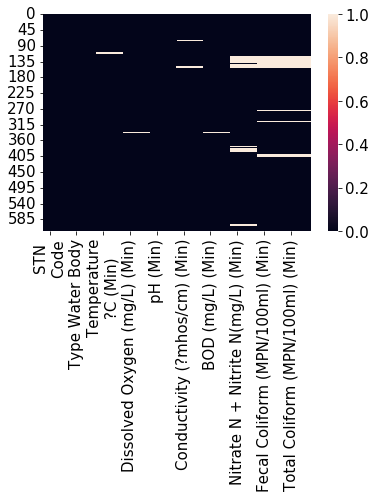

In [44]:
# Finding null values with the help of HeatMap
sns.heatmap(df.isna())

In [45]:
data = df.interpolate(method="linear",limit_area=None,limit=10000)

In [46]:
data

,STN\nCode,Name of Monitoring Location,Type Water Body,State Name,Temperature\n?C (Min),Temperature\n?C (Max),Dissolved Oxygen (mg/L) (Min),Dissolved Oxygen (mg/L) (Max),pH (Min),pH (Max),Conductivity (?mhos/cm) (Min),Conductivity (?mhos/cm) (Max),BOD (mg/L) (Min),BOD (mg/L) (Max),Nitrate N + Nitrite N(mg/L) (Min),Nitrate N + Nitrite N(mg/L) (Max),Fecal Coliform (MPN/100ml) (Min),Fecal Coliform (MPN/100ml) (Max),Total Coliform (MPN/100ml) (Min),Total Coliform (MPN/100ml) (Max)
0,4368.0,"KOLLERU LAKE KOKKIRAYALANKA (V), KAILALUR (M)",LAKE,ANDHRA PRADESH,24.0,27.0,3.2,6.5,7.0,8.0,245.0,5160.0,1.6,3.2,1.02,3.60,9.0,21.0,120.0,210.0
1,2353.0,"KONDAKARLA-AAVA LAKE, PARAWADA PHARMA CITY, VI...",LAKE,ANDHRA PRADESH,26.0,29.0,3.0,6.8,6.9,7.8,599.0,1179.0,1.9,4.6,0.77,3.56,15.0,23.0,150.0,240.0
2,1790.0,"PULICATE LAKE , NELLORE DIST",LAKE,ANDHRA PRADESH,18.0,24.0,4.2,6.0,7.2,8.2,28000.0,56900.0,2.4,2.8,1.20,1.64,3.0,3.0,47.0,150.0
3,4391.0,"CHENGAMBAKAM TANK IN SRI CITY SEZ, TIRUPATHI",TANK,ANDHRA PRADESH,22.0,29.0,5.4,6.2,6.3,7.9,180.0,476.0,1.0,2.5,0.34,2.30,24.0,365.0,170.0,549.0
4,4921.0,ANNAMAYYA PROJECT ON CHEYYERU RESERVOIR,Wetland,ANDHRA PRADESH,21.0,30.0,5.4,6.5,7.3,8.0,496.0,734.0,1.0,2.3,0.35,1.00,43.0,289.0,240.0,727.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,1765.0,"RABINDRASAROVAR NATIONAL LAKE, CALCUTTA, WEST ...",LAKE,WEST BENGAL,22.0,31.0,5.2,9.7,7.2,8.5,252.0,826.0,1.8,4.1,0.30,1.90,330.0,790.0,1100.0,1700.0
616,2544.0,SAHEBBANDH AT PURULIA,LAKE,WEST BENGAL,22.0,32.0,8.8,9.8,7.0,7.6,311.0,422.0,2.7,7.3,0.30,0.80,3100.0,9400.0,4300.0,12000.0
617,2522.0,SINCHAL LAKE FOR DARJEELING,LAKE,WEST BENGAL,7.0,16.0,7.1,8.1,6.9,7.6,13.0,29.0,1.0,1.1,0.30,0.30,70.0,110.0,110.0,210.0
618,2521.0,"WATER RESERVIOR AT DELO LAKE, DARJELLING",LAKE,WEST BENGAL,9.0,24.0,7.2,8.2,6.9,7.6,20.0,36.0,1.0,1.8,0.30,0.30,60.0,130.0,110.0,330.0


In [47]:
data.isna().sum()

STN\nCode                            0
Name of Monitoring Location          0
Type Water Body                      0
State Name                           0
Temperature\n?C (Min)                0
Temperature\n?C (Max)                0
Dissolved Oxygen (mg/L) (Min)        0
Dissolved Oxygen (mg/L) (Max)        0
pH (Min)                             0
pH (Max)                             0
Conductivity (?mhos/cm) (Min)        0
Conductivity (?mhos/cm) (Max)        0
BOD (mg/L) (Min)                     0
BOD (mg/L) (Max)                     0
Nitrate N + Nitrite N(mg/L) (Min)    0
Nitrate N + Nitrite N(mg/L) (Max)    0
Fecal Coliform (MPN/100ml) (Min)     0
Fecal Coliform (MPN/100ml) (Max)     0
Total Coliform (MPN/100ml) (Min)     0
Total Coliform (MPN/100ml) (Max)     0
dtype: int64

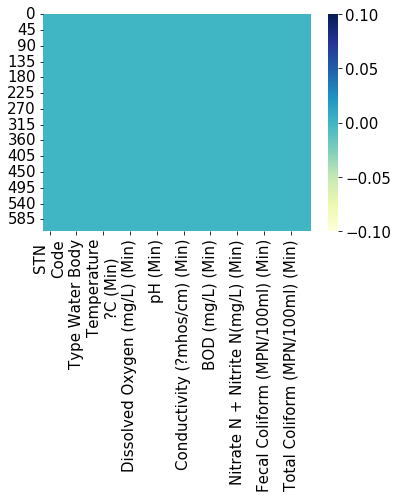

In [48]:
d=data
sns.heatmap(data.isna(),cmap="YlGnBu")

# Exploratory Data Analysis 

In [49]:
water_bodies_list = d['Type Water Body'].str.split(',') 
water_body_type = {} 

for types in water_bodies_list: 
    for key in types: 
        if (key in water_body_type): 
            water_body_type[key]+=1 
        else:
            water_body_type[key]=1 
            
wbdf = pd.DataFrame(water_body_type.values(),index = water_body_type.keys(), columns = {'Counts'})
wbdf.sort_values(by ='Counts',inplace = True)
top_10 = wbdf[0:10]

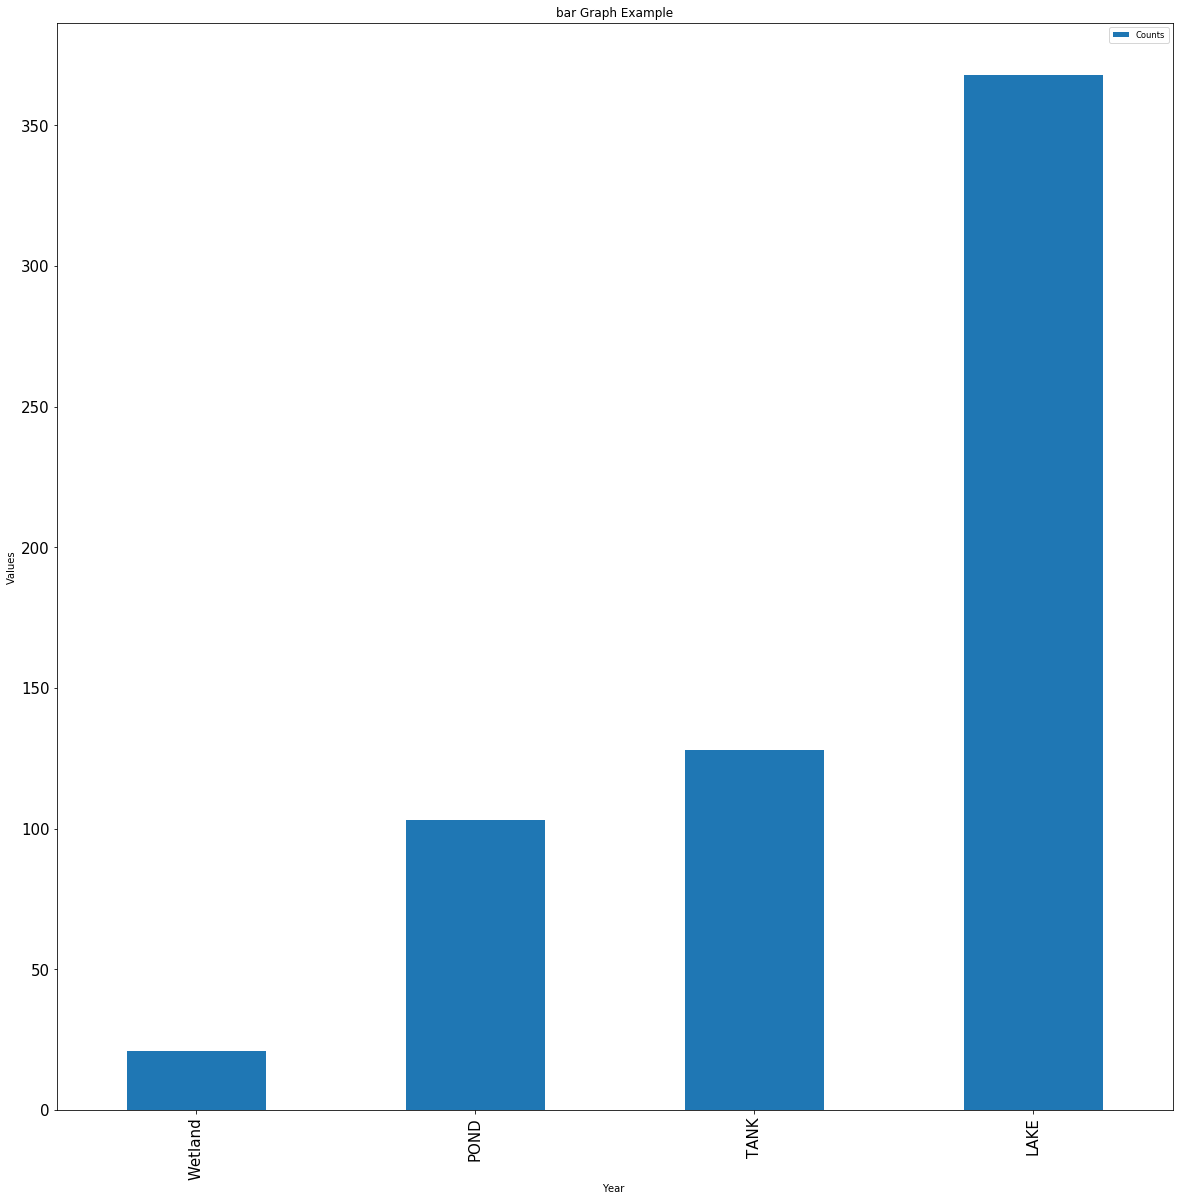

In [50]:
top_10.plot(kind='bar',figsize=(20,20))
plt.xlabel('Year ')
plt.ylabel('Values')
plt.title('bar Graph Example')
plt.legend()
plt.show()

# Water bodies in each state

In [51]:
import plotly.express as px

ax= px.treemap(d,path=["State Name"])
ax.show()

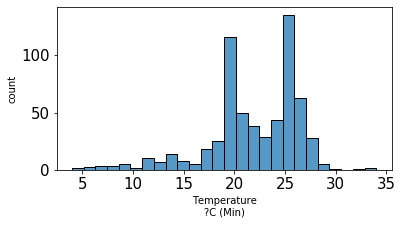

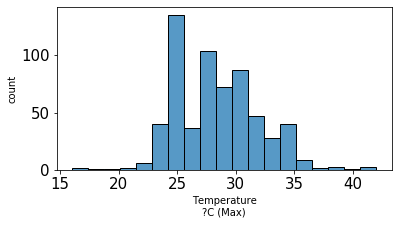

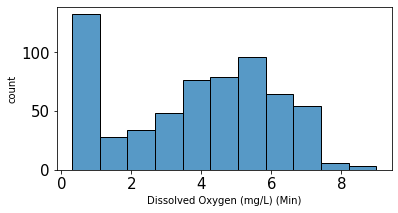

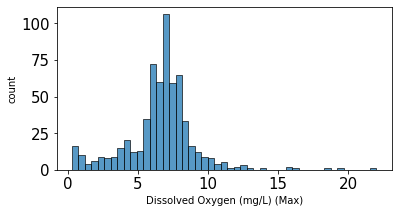

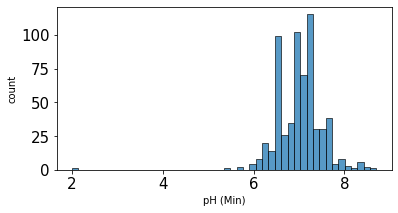

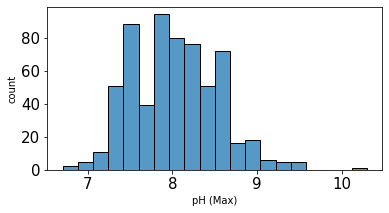

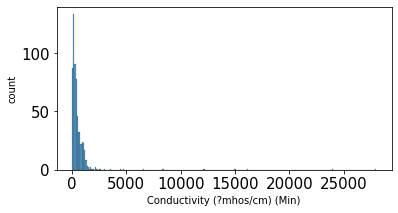

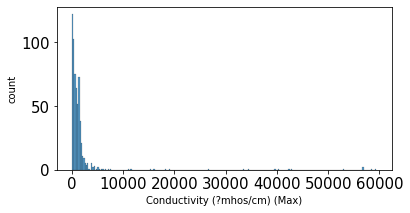

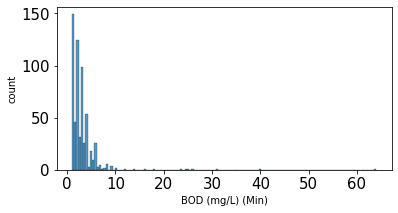

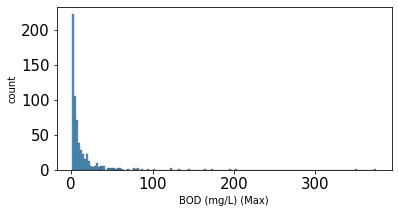

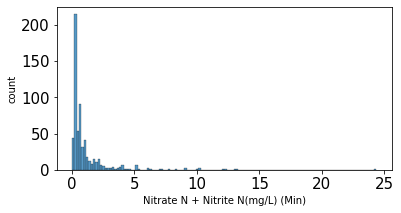

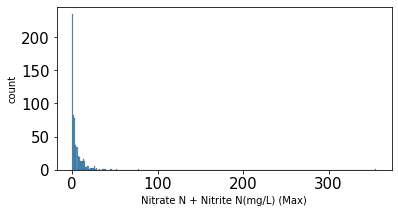

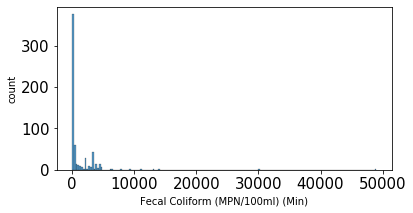

In [ ]:
def hist(var):
    plt.figure(figsize = (6,3))
    sns.histplot(data = d, x = d[var])
    plt.xlabel(var)
    plt.ylabel("count")
    plt.show()

params = ['Temperature\n?C (Min)', 'Temperature\n?C (Max)',
       'Dissolved Oxygen (mg/L) (Min)', 'Dissolved Oxygen (mg/L) (Max)',
       'pH (Min)', 'pH (Max)', 'Conductivity (?mhos/cm) (Min)',
       'Conductivity (?mhos/cm) (Max)', 'BOD (mg/L) (Min)', 'BOD (mg/L) (Max)',
       'Nitrate N + Nitrite N(mg/L) (Min)',
       'Nitrate N + Nitrite N(mg/L) (Max)', 'Fecal Coliform (MPN/100ml) (Min)',
       'Fecal Coliform (MPN/100ml) (Max)', 'Total Coliform (MPN/100ml) (Min)',
       'Total Coliform (MPN/100ml) (Max)']
for n in params:
    hist(n)

# Factors affecting quality of water

#  Temperature


optimum temperature range **20°C to 30°C**.

In [ ]:
y = df.loc[(df['Temperature\n?C (Min)'] >= 20)]
y = df.loc[(df['Temperature\n?C (Max)'] <= 30)]
valuelist = ['Temperature\n?C (Min)','Temperature\n?C (Max)']
y = y.pivot_table(index=['State Name'],
                    values = valuelist, 
               aggfunc='count'
)

In [ ]:
y.plot(kind='bar',figsize=(20,20))
plt.xlabel('State ')
plt.ylabel('Count')
plt.title('Bar Graph')
plt.legend()
plt.show()

# Dissolved Oxygen


The value of dissolved oxygen should ideally be between **4 (mg/L) - 8 (mg/L)**.

In [ ]:
df = d.loc[(d['Dissolved Oxygen (mg/L) (Min)'] >= 4)]
df = d.loc[(d['Dissolved Oxygen (mg/L) (Max)'] <= 8)]

valuelist = ['Dissolved Oxygen (mg/L) (Min)','Dissolved Oxygen (mg/L) (Max)']
df = df.pivot_table(index=['State Name'],
                    values = valuelist, 
               aggfunc='count'
)


df.plot(kind='bar',figsize=(20,20))
plt.xlabel('State ')
plt.ylabel('Count')
plt.title('Bar Graph')
plt.legend()
plt.show()

# pH

pH value ranges from **6 - 8** for optimum water quality.

In [ ]:
df = d.loc[(d['pH (Min)'] >= 6)]
df = d.loc[(d['pH (Min)'] <= 8)]

valuelist = ['pH (Min)','pH (Min)']
df = df.pivot_table(index=['State Name'],
                    values = valuelist, 
               aggfunc='count'
)


df.plot(kind='bar',figsize=(20,20))
plt.xlabel('State ')
plt.ylabel('Count')
plt.title('Bar Graph')
plt.legend()
plt.show()

# Biochemical oxygen demand (BOD) 


In [ ]:
df = d.loc[(d['BOD (mg/L) (Max)'] <= 5)]

valuelist = ['BOD (mg/L) (Max)']
df = df.pivot_table(index=['State Name'],
                    values = valuelist, 
               aggfunc='count'
)


df.plot(kind='bar',figsize=(20,20))
plt.xlabel('State ')
plt.ylabel('Count')
plt.title('Bar Graph')
plt.legend()
plt.show()

# Total Coliform 


In [ ]:
df = d.loc[(d['Total Coliform (MPN/100ml) (Max)'] <= 500)]

valuelist = ['Total Coliform (MPN/100ml) (Max)']
df = df.pivot_table(index=['State Name'],
                    values = valuelist, 
               aggfunc='count'
)


df.plot(kind='bar',figsize=(20,20))
plt.xlabel('State ')
plt.ylabel('Count')
plt.title('Bar Graph')
plt.legend()
plt.show()